The process of discovering patterns in existing data to make a prediction is called **machine learning**.

In [1]:
import pandas as pd
import numpy as np

dc_listings = pd.read_csv("dc_airbnb.csv")
dc_listings.head(3)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD


In [2]:
dc_listings.shape[0]

3723

In [3]:
dc_listings.index

RangeIndex(start=0, stop=3723, step=1)

The **kNN algorithm** is based on the idea that we can predict values we don't know by matching them with the most similar values we do know (the similarity metric).

For continuous value, like price, the main similarity metric that's used is **Euclidean distance**.

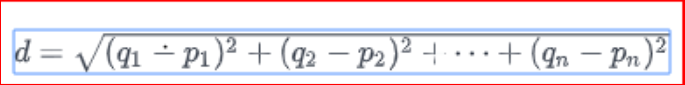

# Univariate Case

In [4]:
acc_value = 3

first_living_space_value = dc_listings.loc[0,"accommodates"]
first_living_space_value

4

In [5]:
distance  = np.sqrt(first_living_space_value-acc_value)**2
distance

1.0

In [6]:
temp_df = dc_listings.copy()

In [7]:
temp_df["distance"] = temp_df["accommodates"].apply(lambda x : np.sqrt((x-acc_value)**2))

In [8]:
temp_df["distance"].value_counts().sort_index()

0.0      461
1.0     2294
2.0      503
3.0      279
4.0       35
5.0       73
6.0       17
7.0       22
8.0        7
9.0       12
10.0       2
11.0       4
12.0       6
13.0       8
Name: distance, dtype: int64

In [9]:
temp = temp_df.copy().sort_values("distance")
temp.head(10)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,distance
3722,70%,100%,1,3,Entire home/apt,0.0,1.0,1.0,$110.00,$40.00,$200.00,2,1125,1,38.883646,-76.999810,Washington,20003,DC,0.0
2197,67%,73%,1,3,Entire home/apt,1.0,1.0,2.0,$135.00,$75.00,$500.00,2,20,23,38.897515,-76.995887,Washington,20002,DC,0.0
549,92%,100%,4,3,Entire home/apt,1.0,1.0,1.0,$110.00,$35.00,NaN,2,1125,114,38.907842,-77.017881,Washington,20001,DC,0.0
2199,100%,29%,1,3,Entire home/apt,1.0,1.0,1.0,$100.00,NaN,NaN,1,1125,3,38.899057,-76.988105,Washington,20002,DC,0.0
2202,75%,67%,1,3,Entire home/apt,2.0,1.0,2.0,$125.00,NaN,NaN,3,1125,7,38.896378,-76.997279,Washington,20002,DC,0.0
3072,92%,98%,3,3,Entire home/apt,0.0,1.0,2.0,$89.00,$75.00,NaN,2,365,70,38.933765,-77.044280,Washington,20010,DC,0.0
1311,67%,89%,1,3,Entire home/apt,0.0,1.0,1.0,$100.00,$50.00,NaN,2,28,1,38.914922,-77.017618,Washington,20001,DC,0.0
1309,86%,100%,1,3,Entire home/apt,1.0,1.0,1.0,$70.00,$50.00,$100.00,1,1125,2,38.918450,-77.033269,Washington,20009,DC,0.0
2219,NaN,NaN,1,3,Entire home/apt,1.0,1.0,1.0,$249.00,NaN,NaN,1,1125,1,38.897567,-76.981845,Washington,20002,DC,0.0
3060,86%,100%,3,3,Entire home/apt,3.0,1.0,3.0,$165.00,NaN,$100.00,3,30,0,38.919976,-77.034512,Washington,20009,DC,0.0


In [10]:
temp_df.index

RangeIndex(start=0, stop=3723, step=1)

In [11]:
np.random.seed(1)

shuffle_index = np.random.permutation(temp_df.index)
shuffle_index

array([ 574, 1593, 3091, ..., 1096,  235, 1061])

In [12]:
temp_df = temp_df.loc[shuffle_index]
temp_df

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,distance
574,100%,100%,1,2,Private room,1.0,1.0,1.0,$125.00,NaN,$300.00,1,4,149,38.913548,-77.031981,Washington,20009,DC,1.0
1593,87%,100%,2,2,Private room,1.0,1.5,1.0,$85.00,$15.00,NaN,1,30,49,38.953431,-77.030695,Washington,20011,DC,1.0
3091,100%,NaN,1,1,Private room,1.0,0.5,1.0,$50.00,NaN,NaN,1,1125,1,38.933491,-77.029679,Washington,20010,DC,2.0
420,58%,51%,480,2,Entire home/apt,1.0,1.0,1.0,$209.00,$150.00,NaN,4,730,2,38.904054,-77.051991,Washington,20037,DC,1.0
808,100%,95%,3,12,Entire home/apt,5.0,2.0,5.0,$215.00,$135.00,$100.00,2,1825,34,38.906118,-76.988873,Washington,20002,DC,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,100%,100%,1,1,Entire home/apt,0.0,1.0,1.0,$75.00,NaN,NaN,4,20,1,38.924325,-77.034065,Washington,20009,DC,2.0
905,100%,25%,6,1,Entire home/apt,0.0,1.0,1.0,$95.00,$50.00,NaN,5,1125,0,38.905723,-77.057786,Washington,20007,DC,2.0
1096,92%,99%,23,2,Shared room,1.0,0.0,1.0,$100.00,NaN,NaN,1,1125,15,38.907376,-77.044780,Washington,20036,DC,1.0
235,100%,63%,2,8,Entire home/apt,2.0,1.0,4.0,$194.00,$89.00,NaN,1,1125,8,38.899648,-77.017537,Washington,20001,DC,5.0


In [13]:
temp_df = temp_df.sort_values("distance")
temp_df.head(10)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,distance
577,98%,52%,49,3,Private room,1.0,1.0,2.0,$185.00,NaN,NaN,2,14,1,38.908356,-77.028146,Washington,20005,DC,0.0
2166,100%,89%,2,3,Entire home/apt,1.0,1.0,1.0,$180.00,NaN,$100.00,1,14,10,38.905808,-77.000012,Washington,20002,DC,0.0
3631,98%,52%,49,3,Entire home/apt,1.0,1.0,2.0,$175.00,NaN,NaN,3,14,1,38.889065,-76.993576,Washington,20003,DC,0.0
71,100%,94%,1,3,Entire home/apt,1.0,1.0,1.0,$128.00,$40.00,NaN,1,1125,9,38.879960,-77.006491,Washington,20003,DC,0.0
1011,NaN,NaN,1,3,Entire home/apt,0.0,1.0,1.0,$115.00,NaN,NaN,1,1125,0,38.907382,-77.035075,Washington,20005,DC,0.0
380,58%,51%,480,3,Entire home/apt,NaN,1.0,1.0,$219.00,NaN,NaN,4,1125,0,38.900820,-77.052956,Washington,20037,DC,0.0
943,NaN,NaN,1,3,Private room,1.0,1.0,1.0,$125.00,$25.00,NaN,1,1125,3,38.913882,-77.038468,Washington,20009,DC,0.0
3107,NaN,NaN,1,3,Entire home/apt,1.0,1.0,1.0,$250.00,NaN,NaN,1,1125,0,38.934027,-77.035193,Washington,20010,DC,0.0
1499,62%,77%,1,3,Entire home/apt,0.0,1.0,2.0,$94.00,NaN,NaN,1,1125,2,38.878030,-77.019914,Washington,20024,DC,0.0
625,100%,0%,1,3,Entire home/apt,1.0,1.0,1.0,$150.00,NaN,NaN,1,1125,5,38.907031,-77.029510,Washington,20005,DC,0.0


In [14]:
temp_df["price"] = temp_df["price"].str.strip("$").str.replace(",","").astype(float)

In [15]:
k = 5

mean_price = temp_df["price"].head(k).mean()
mean_price

156.6

In [16]:
dc_listings["price"] = dc_listings["price"].str.strip("$").str.replace(",","").astype(float)

In [17]:
def predict_price(new_listing,k):
    np.random.seed(1)
    new_df = dc_listings.copy()
    new_df["distance"] = new_df["accommodates"].apply(lambda x : np.sqrt((new_listing-x)**2))
    shuffle_index = np.random.permutation(new_df.index)
    new_df = new_df.loc[shuffle_index]
    new_df = new_df.sort_values("distance")
    nearest_neighbors = new_df["price"].head(k)
    predicted_price = nearest_neighbors.mean()
    return predicted_price

In [18]:
predict_price(3,5)

156.6

In [19]:
predict_price(2,5)

112.8

In [20]:
predict_price(4,5)

124.8

We now have a function that can predict the price for any living space we want to list as long as we know the number of people it can accommodate. The function we wrote represents a **machine learning model**, which means that it outputs a prediction based on the input to the model.

# Validation of a model

A simple way to test the quality of our model is to:

1. Split the dataset into 2 partitions:

 * the training set: contains the majority of the rows
 * the test set: contains the remaining minority of the rows 
 
2. Train the model on training set
 
3. Use the trained model to predict the price value using test data set

4. Compare the predicted_price values with the actual price values in the test set to see how accurate the predicted values were.

This validation process is known as **train/test validation**.

# 1. Spliting Data Set

In [21]:
train_rows = round(dc_listings.shape[0]*.75)
train_rows

2792

In [22]:
train_df = dc_listings[:2792].copy()
test_df = dc_listings[2792:].copy()

# 2. Training Model on train data set

In [23]:
def predict_price(new_listing,k):
    np.random.seed(1)
    new_df = train_df.copy()
    new_df["distance"] = new_df["accommodates"].apply(lambda x : np.sqrt((new_listing-x)**2))
    shuffle_index = np.random.permutation(new_df.index)
    new_df = new_df.loc[shuffle_index]
    new_df = new_df.sort_values("distance")
    nearest_neighbors = new_df["price"].head(k)
    predicted_price = nearest_neighbors.mean()
    return predicted_price

# 3. Prediction on Test Data Set

In [24]:
test_df["predicted_price"] = test_df["accommodates"].apply(predict_price,k=5)

In [25]:
test_df[["price","predicted_price"]]

,price,predicted_price
2792,120.0,116.6
2793,140.0,126.4
2794,299.0,122.8
2795,85.0,126.4
2796,175.0,191.8
...,...,...
3718,135.0,122.8
3719,79.0,116.6
3720,275.0,191.8
3721,179.0,116.6


# 4. error metric

For regression problem we use **mean absolute error (mae)** or **root mean squared error (rmse)**  as error matric

In [26]:
mae = np.abs(test_df["predicted_price"] - test_df["price"]).mean()
mae

58.77013963480097

In [27]:
squared_error = (test_df["predicted_price"] - test_df["price"])**2
mse = squared_error.mean()
mse

19458.025306122436

In [28]:
rmse = np.sqrt(mse)
rmse

139.49202595891435

The model achieved an RMSE value of approximately 139.49, which implies that we should expect for the model to be off by 139.49 dollars on average for the predicted price values. Given that most of the living spaces are listed at just a few hundred dollars, we need to reduce this error as much as possible to improve the model's usefulness.

In [29]:
dc_listings.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,160.0,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,350.0,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,50.0,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,100%,NaN,1,2,Private room,1.0,1.0,1.0,95.0,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,92%,67%,1,4,Entire home/apt,1.0,1.0,1.0,50.0,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD
